<a href="https://colab.research.google.com/github/HussamCheema/DermCNN/blob/master/DermCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras import optimizers

Using TensorFlow backend.


In [2]:
!git clone https://github.com/HussamCheema/DermCNN.git

Cloning into 'DermCNN'...
remote: Enumerating objects: 11372, done.
remote: Counting objects: 100% (11372/11372), done.
remote: Compressing objects: 100% (11372/11372), done.
remote: Total 11372 (delta 17), reused 11335 (delta 0), pack-reused 0
Receiving objects: 100% (11372/11372), 438.41 MiB | 14.61 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Checking out files: 100% (11363/11363), done.


# Data Pre-Processing

In [0]:
data = []
labels = []

In [0]:
batch_size = 32
epochs = 40

In [0]:
for folder in range(1,8):
  for image in os.listdir(os.getcwd()+'/DermCNN/'+str(folder)+'/'):
    try:
      x = cv2.imread(os.getcwd()+'/DermCNN/'+str(folder)+'/'+image)
      x = cv2.resize(x, (150,150))
      data.append(x)
      labels.append(folder-1)
    except: pass


In [6]:
data = np.array(data)
labels = np.array(labels)
print(len(data))
print(len(labels))
print(data.shape)
print(labels.shape)

11355
11355
(11355, 150, 150, 3)
(11355,)


In [7]:
data = data.astype('float')
data /= 255
labels = keras.utils.to_categorical(labels, 7)
print(labels.shape)

(11355, 7)


#Shuffle Data


In [0]:
def shuffle(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

In [0]:
for i in range(10):
    shuffle(data,labels)

# CNN MODEL

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 128)     3584      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 148, 148, 64)      73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 74, 74, 32)        18464     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 74, 74, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 37, 37, 16)        4624      
__________

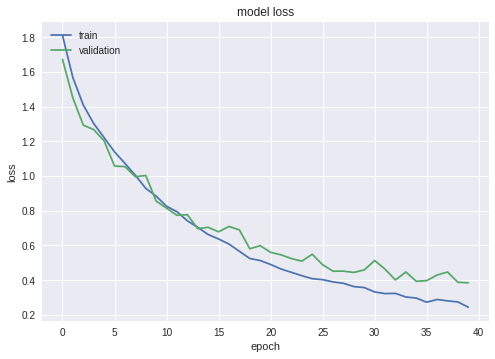

In [12]:
model = Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=128,input_shape=(150, 150, 3),activation="relu",padding="valid"))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(kernel_size=(3,3),filters=32,activation="relu",padding="same"))
model.add(Conv2D(kernel_size=(3,3),filters=32,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(kernel_size=(3,3),filters=16,activation="relu",padding="same"))
model.add(Conv2D(kernel_size=(3,3),filters=16,activation="relu",padding="same"))
model.add(Conv2D(kernel_size=(3,3),filters=8,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dropout(0.75))
model.add(Dense(100,activation="relu"))
model.add(Dense(7,activation='softmax'))
model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.0005),
              metrics=['accuracy'])

X = model.fit(data,labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          shuffle=True,
          validation_split=0.2)

plt.plot(X.history['loss'])
plt.plot(X.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()